# Mean-Variance Portfolio Theory

Constructing a Mean-Standard Deviation Diagram in order to visualize the Efficient Frontier using two methods.

1. Using brute force to generate many random portfolios
2. Working out a mathematical solution to the Markowitz Problem

## Part One: Brute Force Random Generation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
assets = pd.read_pickle("data_st.pkl")

In [3]:
daily_returns_dict = {}

for asset in assets:
    close = assets[asset]["close"]["20160101":"20171231"]
    pre_close = assets[asset]["pre_close"]["20160101":"20171231"]
    daily_return = (close - pre_close) / pre_close
    daily_returns_dict[asset] = daily_return
    
daily_returns = pd.DataFrame(daily_returns_dict)

In [4]:
daily_returns.head()

,002463.SZ,600426.SH,300284.SZ,002440.SZ,600026.SH,300059.SZ,002013.SZ,601318.SH,600183.SH,002258.SZ,...,603517.SH,000002.SZ,002025.SZ,600600.SH,002304.SZ,600309.SH,000876.SZ,000333.SZ,002456.SZ,601888.SH
idx_datetime,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.099071,-0.099792,-0.071956,-0.098688,-0.099567,-0.099942,-0.055605,-0.054167,-0.100101,-0.099608,...,NaN,0.0,-0.091189,-0.065361,-0.065071,-0.052101,0.0,-0.094455,-0.099936,-0.058506
2016-01-05,-0.036082,0.005389,0.049702,0.001747,0.032452,-0.054239,0.058411,0.013216,-0.034831,0.018293,...,NaN,0.0,0.050381,-0.006123,0.045412,-0.003546,0.0,0.054172,0.042980,-0.008596
2016-01-06,0.040998,0.032925,0.001420,0.021512,0.006985,0.028449,0.060486,0.000870,0.024447,0.033362,...,NaN,0.0,0.024587,0.019780,-0.003732,0.029063,0.0,0.008299,0.006868,0.020412
2016-01-07,-0.097603,-0.096368,-0.086525,-0.091064,-0.098266,-0.099890,-0.099917,-0.022010,-0.100000,-0.100166,...,NaN,0.0,-0.099528,-0.053418,-0.080761,-0.063977,0.0,-0.080722,-0.099932,-0.080014
2016-01-08,0.015180,0.028712,-0.011387,0.023168,0.032051,0.009756,0.054579,0.005034,0.005051,-0.015179,...,NaN,0.0,-0.012669,0.023850,-0.005379,0.028941,0.0,0.026515,-0.018568,0.030017


In [5]:
annual_returns = daily_returns.mean() * 240
variances = daily_returns.var() * 240
covariance_matrix = daily_returns.cov() * 240

In [6]:
annual_returns.head()

002463.SZ   -0.023075
600426.SH    0.372187
300284.SZ   -0.051876
002440.SZ    0.115851
600026.SH   -0.130032
dtype: float64

In [7]:
variances.head()

002463.SZ    0.131542
600426.SH    0.115300
300284.SZ    0.162300
002440.SZ    0.149178
600026.SH    0.099007
dtype: float64

In [8]:
covariance_matrix.head()

,002463.SZ,600426.SH,300284.SZ,002440.SZ,600026.SH,300059.SZ,002013.SZ,601318.SH,600183.SH,002258.SZ,...,603517.SH,000002.SZ,002025.SZ,600600.SH,002304.SZ,600309.SH,000876.SZ,000333.SZ,002456.SZ,601888.SH
002463.SZ,0.131542,0.065178,0.058815,0.067982,0.067144,0.093155,0.061802,0.023453,0.076133,0.073272,...,0.034099,0.009342,0.064241,0.039263,0.033373,0.046625,0.020067,0.041355,0.083806,0.048593
600426.SH,0.065178,0.115300,0.049930,0.069973,0.061171,0.065792,0.053387,0.029234,0.066890,0.065456,...,0.017168,0.011475,0.055898,0.037515,0.042205,0.058567,0.014739,0.051211,0.066617,0.047643
300284.SZ,0.058815,0.049930,0.162300,0.064185,0.065006,0.082873,0.057229,0.015363,0.061218,0.053128,...,0.001398,0.001029,0.060798,0.029811,0.028507,0.041137,0.009150,0.030600,0.072562,0.038805
002440.SZ,0.067982,0.069973,0.064185,0.149178,0.068371,0.085405,0.060047,0.019413,0.060932,0.062444,...,0.009718,0.001328,0.062399,0.033607,0.031145,0.055120,0.014368,0.039107,0.070767,0.051050
600026.SH,0.067144,0.061171,0.065006,0.068371,0.099007,0.080801,0.055377,0.020587,0.060778,0.054742,...,0.013760,0.005295,0.058688,0.036036,0.030546,0.049004,0.012641,0.039453,0.066352,0.041893


In [9]:
portfolio_returns = []
portfolio_standard_deviations = []

# Generate random portfolios
for i in range(10000):
    # Randomize weights using the Dirichlet distribution
    weights = np.random.dirichlet(np.ones(len(assets)))
    
    # Get return of portfolio
    p_return = np.dot(weights, annual_returns)
    portfolio_returns.append(p_return)
    
    # Get standard deviation of portfolio
    p_variance = np.dot(np.dot(weights.T, covariance_matrix), weights)
    p_standard_deviation = np.sqrt(p_variance)
    portfolio_standard_deviations.append(p_standard_deviation)

portfolios_dict = {
    "Returns": portfolio_returns,
    "Standard Deviations": portfolio_standard_deviations
}

portfolios = pd.DataFrame(portfolios_dict)

In [10]:
portfolios.head()

,Returns,Standard Deviations
0,0.248125,0.202187
1,0.352399,0.198345
2,0.530359,0.220464
3,0.653245,0.217753
4,0.374166,0.209370


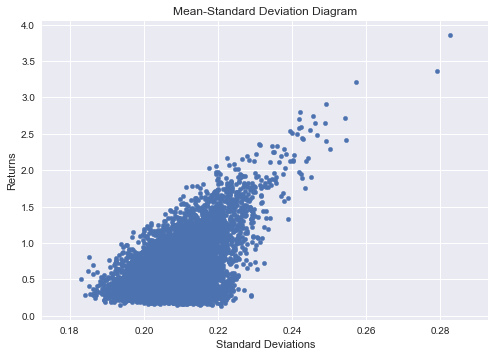

In [11]:
plt.style.use("seaborn")
portfolios.plot.scatter(
    title="Mean-Standard Deviation Diagram",
    x="Standard Deviations",
    y="Returns"
)